In [1]:
# Generic Libraries
from PIL import Image
import os
import pandas as pd
import numpy as np

In [2]:
#Tesseract Library
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe'

In [3]:
#Warnings
import warnings
warnings.filterwarnings("ignore")

In [104]:
file1 = 'result_Page_1.jpg'
text1 = pytesseract.image_to_string(Image.open(file1), timeout=5)
text1

'INDIA\nDevice Name: Pulse Oximeter\n\nREF NML903055\n\nLOT: 34683\n\n[:£iJ¢®\n\n \n\n'

In [91]:
file2 = 'result_Page_2.jpg'
text2 = pytesseract.image_to_string(Image.open(file2), timeout=5)

In [89]:
file3 = 'result_Page_3.jpg'
text3 = pytesseract.image_to_string(Image.open(file3), timeout=5)

In [7]:
file4 = 'result_Page_4.jpg'
text4 = pytesseract.image_to_string(Image.open(file4), timeout=5)

In [81]:
file5 = 'result_Page_5.jpg'
text5 = pytesseract.image_to_string(Image.open(file5), timeout=5)

In [9]:
file6 = 'result_Page_6.jpg'
text6 = pytesseract.image_to_string(Image.open(file6), timeout=5)

In [87]:
file7 = 'result_Page_7.jpg'
text7 = pytesseract.image_to_string(Image.open(file7), timeout=5)

In [12]:
text_1 = text1.split(sep = '\n')
dict1 = {'Country': text_1[0], 'Device Name':text_1[1].split(sep = ':')[1], 'REF': text_1[3].split(sep = ' ')[1], 'LOT': text_1[5].split(sep = ':')[1]}
dict1

{'Country': 'INDIA',
 'Device Name': ' Pulse Oximeter',
 'REF': 'NML903055',
 'LOT': ' 34683'}

In [92]:
text_2 = text2.split(sep = '\n')
text2 = text_2[3].split(' ')[1:]
text2 = text2[0] + text2[1]
dict2 = {'Country': text_2[0], 'Device Name':text_2[1].split(sep = ':')[1], 'REF': text2, 'LOT': text_2[5].split(sep = ':')[1]}
dict2

{'Country': 'INDIA',
 'Device Name': ' Blood Warmer',
 'REF': 'NML903090',
 'LOT': ' 34641'}

In [90]:
text_3 = text3.split(sep = '\n')
text3 = text_3[3].split(' ')[1:]
text3 = text3[0] + text3[1]
dict3 = {'Country': text_3[0], 'Device Name':text_3[1].split(sep = ':')[1], 'REF': text3, 'LOT': text_3[5].split(sep = ':')[1]}
dict3

{'Country': 'USA',
 'Device Name': ' C-Pap Machine',
 'REF': 'NML9031',
 'LOT': ' 34662'}

In [57]:
text_4 = text4.split(sep = '\n')
dict4 = {'Country': text_4[0], 'Device Name':text_4[1].split(sep = ':')[1], 'REF': text_4[3].split(sep = ' ')[1], 'LOT': text_4[5].split(sep = ':')[1]}
dict4

{'Country': 'USA',
 'Device Name': ' ECG Machine',
 'REF': 'NML903060',
 'LOT': ' 34690'}

In [82]:
text_5 = text5.split(sep = '\n')
text5 = text_5[3].split(' ')[1:]
text5 = text5[0] + text5[1]
dict5 = {'Country': text_5[0], 'Device Name':text_5[1].split(sep = ':')[1], 'REF': text5, 'LOT': text_5[5].split(sep = ':')[1]}
dict5

{'Country': 'EU',
 'Device Name': ' HFNC Machine',
 'REF': 'NML903095',
 'LOT': ' 34648'}

In [22]:
text_6 = text6.split(sep = '\n')
text_6
dict6 = {'Country': text_6[0], 'Device Name':text_6[1].split(sep = ':')[1], 'REF': text_6[3].split(sep = ' ')[1], 'LOT': text_6[5].split(sep = ':')[1]}
dict6

{'Country': 'EU',
 'Device Name': ' Infusion Pump',
 'REF': 'NML903065',
 'LOT': ' 34697'}

In [88]:
text_7 = text7.split(sep = '\n')
text7 = text_7[3].split(' ')[1:]
text7 = text7[0] + text7[1]
dict7 = {'Country': text_7[0], 'Device Name':text_7[1].split(sep = ':')[1], 'REF': text7, 'LOT': text_7[5].split(sep = ':')[1]}
dict7

{'Country': 'EU',
 'Device Name': ' NIBP Monitor',
 'REF': 'NML90305O',
 'LOT': ' 34676'}

In [93]:
list_of_dict = [dict1, dict2,dict3,dict4,dict5,dict6,dict7]

In [94]:
df = pd.DataFrame(list_of_dict)

In [95]:
df

,Country,Device Name,REF,LOT
0,INDIA,Pulse Oximeter,NML903055,34683
1,INDIA,Blood Warmer,NML903090,34641
2,USA,C-Pap Machine,NML9031,34662
3,USA,ECG Machine,NML903060,34690
4,EU,HFNC Machine,NML903095,34648
5,EU,Infusion Pump,NML903065,34697
6,EU,NIBP Monitor,NML90305O,34676


In [32]:
!pip install mtm

In [40]:
import cv2
# Load image and greyscale it
im = np.array(Image.open("result_Page_7.jpg").convert('L'))

# Normalize and threshold image
im = cv2.normalize(im, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
res, im = cv2.threshold(im, 64, 255, cv2.THRESH_BINARY)

# Fill everything that is the same colour (black) as top-left corner with white
cv2.floodFill(im, None, (0,0), 0)

# Fill everything that is the same colour (white) as top-left corner with black
cv2.floodFill(im, None, (0,0), 0)

# Save result
Image.fromarray(im).save("image7.png")
#plt.imshow('hell.png')

Found hits  1
[(BoundingBox, score:0.42, xywh:(155, 367, 196, 152), index:1, 2)]


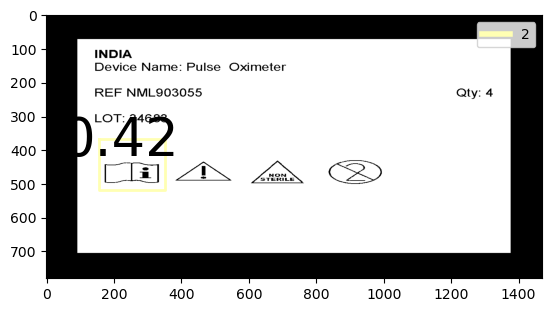

In [46]:
import mtm as MTM
from mtm.detection import plotDetections
import cv2
img = cv2.imread('image1.png',0)        # 0 as in load the gray scale of the image
import glob

listTemplates = [cv2.imread(file,0) for file in glob.glob("symbols/*.png")]
listLabels = ['1','2','3','4','5','6','7','8','9']

import matplotlib.pyplot as plt
%matplotlib inline


img2 = img.copy()
listHit= MTM.findMatches(img, listTemplates, listLabels)
singleObject = MTM.findMatches(img, listTemplates, singleMatch=False, downscalingFactor= 1) # there should be 1 top hit per template

finalHits = MTM.matchTemplates(img,
                               listTemplates,
                               listLabels,
                               scoreThreshold=0.4) 

print("Found hits ", len(finalHits))
print (np.array(finalHits)) # better formatting with array

#%% Display matches
plotDetections(img, 
               finalHits, 
               showLegend=True, 
               showScore=True)

Found hits  1
[(BoundingBox, score:0.96, xywh:(140, 417, 191, 76), index:0, 1)]


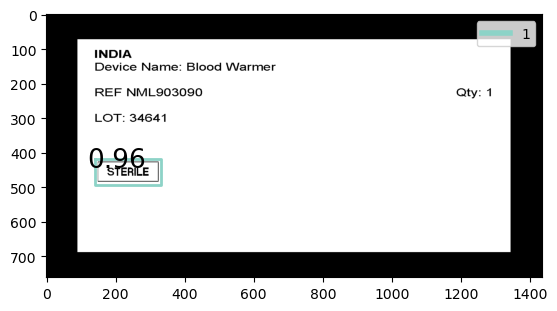

In [47]:
img = cv2.imread('image2.png',0)        # 0 as in load the gray scale of the image
import glob

listTemplates = [cv2.imread(file,0) for file in glob.glob("symbols/*.png")]
listLabels = ['1','2','3','4','5','6','7','8','9']

import matplotlib.pyplot as plt
%matplotlib inline


img2 = img.copy()
listHit= MTM.findMatches(img, listTemplates, listLabels)
singleObject = MTM.findMatches(img, listTemplates, singleMatch=False, downscalingFactor= 1) # there should be 1 top hit per template

finalHits = MTM.matchTemplates(img,
                               listTemplates,
                               listLabels,
                               scoreThreshold=0.4) 

print("Found hits ", len(finalHits))
print (np.array(finalHits)) # better formatting with array

#%% Display matches
plotDetections(img, 
               finalHits, 
               showLegend=True, 
               showScore=True)

Found hits  2
[(BoundingBox, score:0.96, xywh:(140, 417, 191, 76), index:0, 1)
 (BoundingBox, score:0.56, xywh:(791, 368, 172, 172), index:7, 8)]


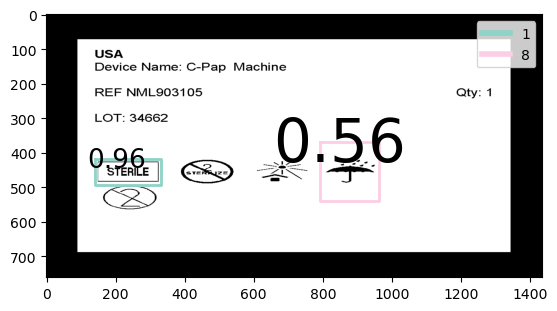

In [48]:
img = cv2.imread('image3.png',0)        # 0 as in load the gray scale of the image
import glob

listTemplates = [cv2.imread(file,0) for file in glob.glob("symbols/*.png")]
listLabels = ['1','2','3','4','5','6','7','8','9']

import matplotlib.pyplot as plt
%matplotlib inline


img2 = img.copy()
listHit= MTM.findMatches(img, listTemplates, listLabels)
singleObject = MTM.findMatches(img, listTemplates, singleMatch=False, downscalingFactor= 1) # there should be 1 top hit per template

finalHits = MTM.matchTemplates(img,
                               listTemplates,
                               listLabels,
                               scoreThreshold=0.4) 

print("Found hits ", len(finalHits))
print (np.array(finalHits)) # better formatting with array

#%% Display matches
plotDetections(img, 
               finalHits, 
               showLegend=True, 
               showScore=True)

Found hits  2
[(BoundingBox, score:0.57, xywh:(812, 381, 172, 172), index:7, 8)
 (BoundingBox, score:0.42, xywh:(155, 367, 196, 152), index:1, 2)]


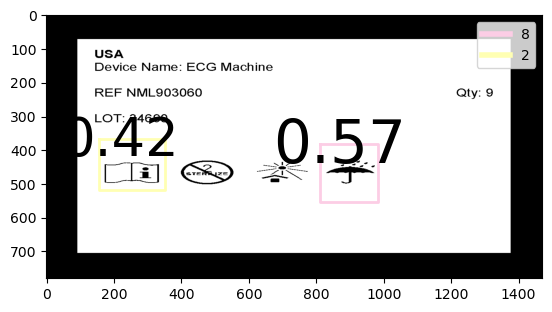

In [49]:
img = cv2.imread('image4.png',0)        # 0 as in load the gray scale of the image
import glob

listTemplates = [cv2.imread(file,0) for file in glob.glob("symbols/*.png")]
listLabels = ['1','2','3','4','5','6','7','8','9']

import matplotlib.pyplot as plt
%matplotlib inline


img2 = img.copy()
listHit= MTM.findMatches(img, listTemplates, listLabels)
singleObject = MTM.findMatches(img, listTemplates, singleMatch=False, downscalingFactor= 1) # there should be 1 top hit per template

finalHits = MTM.matchTemplates(img,
                               listTemplates,
                               listLabels,
                               scoreThreshold=0.4) 

print("Found hits ", len(finalHits))
print (np.array(finalHits)) # better formatting with array

# Display matches
plotDetections(img, 
               finalHits, 
               showLegend=True, 
               showScore=True)

Found hits  2
[(BoundingBox, score:0.96, xywh:(140, 417, 191, 76), index:0, 1)
 (BoundingBox, score:0.56, xywh:(600, 368, 172, 172), index:7, 8)]


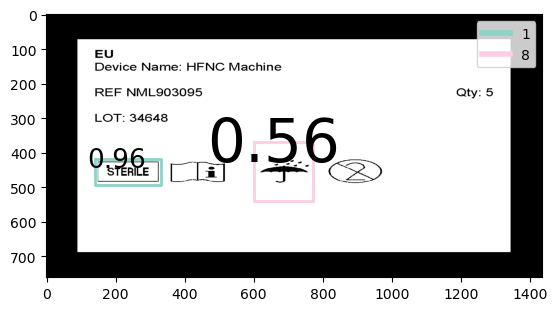

In [50]:
img = cv2.imread('image5.png',0)        # 0 as in load the gray scale of the image
import glob

listTemplates = [cv2.imread(file,0) for file in glob.glob("symbols/*.png")]
listLabels = ['1','2','3','4','5','6','7','8','9']

import matplotlib.pyplot as plt
%matplotlib inline


img2 = img.copy()
listHit= MTM.findMatches(img, listTemplates, listLabels)
singleObject = MTM.findMatches(img, listTemplates, singleMatch=False, downscalingFactor= 1) # there should be 1 top hit per template

finalHits = MTM.matchTemplates(img,
                               listTemplates,
                               listLabels,
                               scoreThreshold=0.4) 

print("Found hits ", len(finalHits))
print (np.array(finalHits)) # better formatting with array

#%% Display matches
plotDetections(img, 
               finalHits, 
               showLegend=True, 
               showScore=True)

Found hits  2
[(BoundingBox, score:0.57, xywh:(617, 381, 172, 172), index:7, 8)
 (BoundingBox, score:0.42, xywh:(155, 367, 196, 152), index:1, 2)]


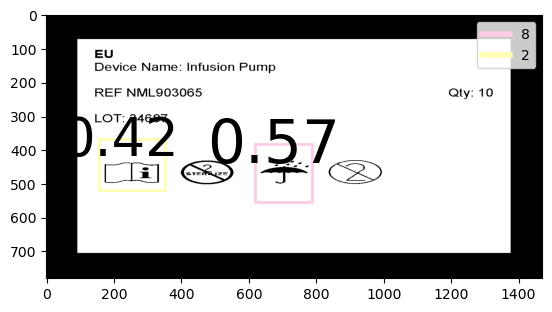

In [51]:
img = cv2.imread('image6.png',0)        # 0 as in load the gray scale of the image
import glob

listTemplates = [cv2.imread(file,0) for file in glob.glob("symbols/*.png")]
listLabels = ['1','2','3','4','5','6','7','8','9']

import matplotlib.pyplot as plt
%matplotlib inline


img2 = img.copy()
listHit= MTM.findMatches(img, listTemplates, listLabels)
singleObject = MTM.findMatches(img, listTemplates, singleMatch=False, downscalingFactor= 1) # there should be 1 top hit per template

finalHits = MTM.matchTemplates(img,
                               listTemplates,
                               listLabels,
                               scoreThreshold=0.4) 

print("Found hits ", len(finalHits))
print (np.array(finalHits)) # better formatting with array

#%% Display matches
plotDetections(img, 
               finalHits, 
               showLegend=True, 
               showScore=True)

Found hits  2
[(BoundingBox, score:0.62, xywh:(129, 468, 191, 76), index:0, 1)
 (BoundingBox, score:0.40, xywh:(1052, 82, 182, 152), index:3, 4)]


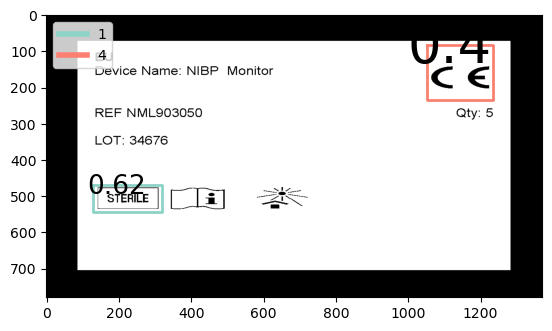

In [56]:
img = cv2.imread('image7.png',0)        # 0 as in load the gray scale of the image
import glob

listTemplates = [cv2.imread(file,0) for file in glob.glob("symbols/*.png")]
listLabels = ['1','2','3','4','5','6','7','8','9']

import matplotlib.pyplot as plt
%matplotlib inline


img2 = img.copy()
listHit= MTM.findMatches(img, listTemplates, listLabels)
singleObject = MTM.findMatches(img, listTemplates, singleMatch=False, downscalingFactor= 1) # there should be 1 top hit per template

finalHits = MTM.matchTemplates(img,
                               listTemplates,
                               listLabels,
                               scoreThreshold=0.37) 

print("Found hits ", len(finalHits))
print (np.array(finalHits)) # better formatting with array

#%% Display matches
plotDetections(img, 
               finalHits, 
               showLegend=True, 
               showScore=True)

In [ ]:
cv2.imread(file,0) for file in glob.glob("symbols/*.png")

(152, 196)


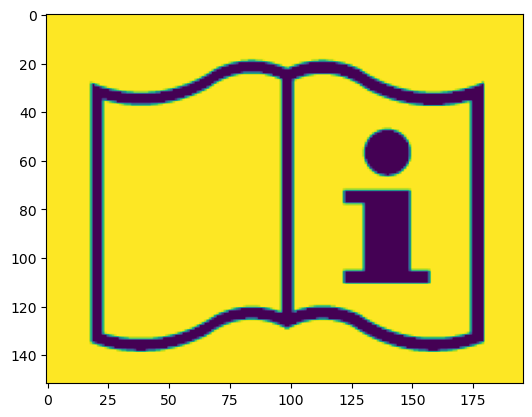

In [36]:
print(listTemplates[1].shape)
plt.imshow(listTemplates[1])

(76, 191)


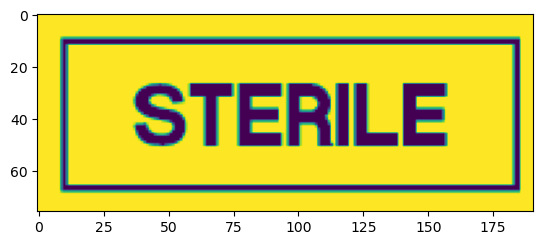

In [37]:
print(listTemplates[0].shape)
plt.imshow(listTemplates[0])

In [45]:
listTemplates1 = [('1.png'), 
                 ('2.png')]

In [106]:
import numpy as np
import cv2

img = cv2.resize(cv2.imread('result_Page_1.jpg', 0), (0, 0), fx=0.8, fy=0.8)
template = cv2.resize(cv2.imread('symbols/1.png', 0), (0, 0), fx=0.8, fy=0.8)
h, w = template.shape

# methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
            # cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]

# Blue color in BGR
color = (255, 0, 0)


img2 = img.copy()

result = cv2.matchTemplate(img2, template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    location = min_loc
else:
    location = max_loc

bottom_right = (location[1] + w, location[0] + h)    
cv2.rectangle(img2, location, bottom_right, color, 5)
cv2.imshow('Do you see blue box? ', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()